In [1]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv

In [2]:
test_data_orig = pd.read_csv(os.path.join('data', 'loanDataTest.csv'))
pd.set_option('display.max_columns', None)
test_data_orig

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [3]:
train_data_orig = pd.read_csv(os.path.join('data', 'loanDataTrain.csv'))
pd.set_option('display.max_columns', None)
train_data_orig

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Check values in test and train sets
test_Gender = test_data_orig.Gender.unique()
train_Gender = train_data_orig.Gender.unique()
test_Dependents = test_data_orig.Dependents.unique()
train_Dependents = train_data_orig.Dependents.unique()
test_Education = test_data_orig.Education.unique()
train_Education = train_data_orig.Education.unique()
test_Self_Employed = test_data_orig.Self_Employed.unique()
train_Self_Employed = train_data_orig.Self_Employed.unique()
test_ApplicantIncome = test_data_orig.ApplicantIncome.unique()
train_ApplicantIncome = train_data_orig.ApplicantIncome.unique()
test_CoapplicantIncome = test_data_orig.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_orig.CoapplicantIncome.unique()
test_LoanAmount = test_data_orig.LoanAmount.unique()
train_LoanAmount = train_data_orig.LoanAmount.unique()
test_Loan_Amount_Term = test_data_orig.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_orig.Loan_Amount_Term.unique()
test_Credit_History = test_data_orig.Credit_History.unique()
train_Credit_History = train_data_orig.Credit_History.unique()
test_Property_Area = test_data_orig.Property_Area.unique()
train_Property_Area = train_data_orig.Property_Area.unique()

train_Loan_Status = train_data_orig.Loan_Status.unique()

#Print out values
#test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, test_ApplicantIncome, train_ApplicantIncome, test_CoapplicantIncome, train_CoapplicantIncome, test_LoanAmount, train_LoanAmount, test_Loan_Amount_Term, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

In [5]:
#drop nans
test_data = test_data_orig.dropna(axis=0)
train_data_pre_dummy = train_data_orig.dropna(axis=0)

test_Gender = test_data.Gender.unique()
train_Gender = train_data_pre_dummy.Gender.unique()
test_Dependents = test_data.Dependents.unique()
train_Dependents = train_data_pre_dummy.Dependents.unique()
test_Education = test_data.Education.unique()
train_Education = train_data_pre_dummy.Education.unique()
test_Self_Employed = test_data.Self_Employed.unique()
train_Self_Employed = train_data_pre_dummy.Self_Employed.unique()
test_ApplicantIncome = test_data.ApplicantIncome.unique()
train_ApplicantIncome = train_data_pre_dummy.ApplicantIncome.unique()
test_CoapplicantIncome = test_data.CoapplicantIncome.unique()
train_CoapplicantIncome = train_data_pre_dummy.CoapplicantIncome.unique()
test_LoanAmount = test_data.LoanAmount.unique()
train_LoanAmount = train_data_pre_dummy.LoanAmount.unique()
test_Loan_Amount_Term = test_data.Loan_Amount_Term.unique()
train_Loan_Amount_Term = train_data_pre_dummy.Loan_Amount_Term.unique()
test_Credit_History = test_data.Credit_History.unique()
train_Credit_History = train_data_pre_dummy.Credit_History.unique()
test_Property_Area = test_data.Property_Area.unique()
train_Property_Area = train_data_pre_dummy.Property_Area.unique()

train_Loan_Status = train_data_pre_dummy.Loan_Status.unique()

#Print out categorical values
test_Gender, train_Gender, test_Dependents, train_Dependents, test_Education, train_Education, test_Self_Employed, train_Self_Employed, train_Loan_Amount_Term, test_Credit_History, train_Credit_History, test_Property_Area, train_Property_Area, train_Loan_Status

(array(['Male', 'Female'], dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['0', '1', '2', '3+'], dtype=object),
 array(['1', '0', '2', '3+'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.]),
 array([1., 0.]),
 array([1., 0.]),
 array(['Urban', 'Semiurban', 'Rural'], dtype=object),
 array(['Rural', 'Urban', 'Semiurban'], dtype=object),
 array(['N', 'Y'], dtype=object))

In [6]:
#Make loan status a dummy variable, drop the "N" column
train_data = pd.get_dummies(train_data_pre_dummy, prefix=['Loan_Status'], columns=['Loan_Status'])
train_data.drop('Loan_Status_N', axis=1, inplace=True)
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [7]:
#Replace "3+" in dependents with "3" - not perfect, but easier to deal with
train_data = train_data.replace(['3+'],'3')
test_data = test_data.replace(['3+'],'3')

In [8]:
#Limited dummy variables
train_data_limit_dummies = pd.get_dummies(train_data, prefix=['Gender'], columns=['Gender'])
train_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data, prefix=['Gender'], columns=['Gender'])
test_data_limit_dummies.drop('Gender_Male', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Education'], columns=['Education'])
train_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Education'], columns=['Education'])
test_data_limit_dummies.drop('Education_Not Graduate', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Married'], columns=['Married'])
train_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Married'], columns=['Married'])
test_data_limit_dummies.drop('Married_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
train_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Self_Employed'], columns=['Self_Employed'])
test_data_limit_dummies.drop('Self_Employed_No', axis=1, inplace=True)
train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
train_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Credit_History'], columns=['Credit_History'])
test_data_limit_dummies.drop('Credit_History_0.0', axis=1, inplace=True)

train_data_limit_dummies = pd.get_dummies(train_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])
test_data_limit_dummies = pd.get_dummies(test_data_limit_dummies, prefix=['Property_Area'], columns=['Property_Area'])

train_data_limit_dummies

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status_Y,Gender_Female,Education_Graduate,Married_Yes,Self_Employed_Yes,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,1,4583,1508.0,128.0,360.0,0,0,1,1,0,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1,0,1,1,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1,0,0,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1,0,1,0,0,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1,1,1,0,0,1,1,0,0
610,LP002979,3,4106,0.0,40.0,180.0,1,0,1,1,0,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1,0,1,1,0,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1,0,1,1,0,1,0,0,1


## 1. Decision Tree: train on randomly split training set with dummies, random_state = 57

In [9]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [10]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [11]:
from sklearn import tree

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6833333333333333

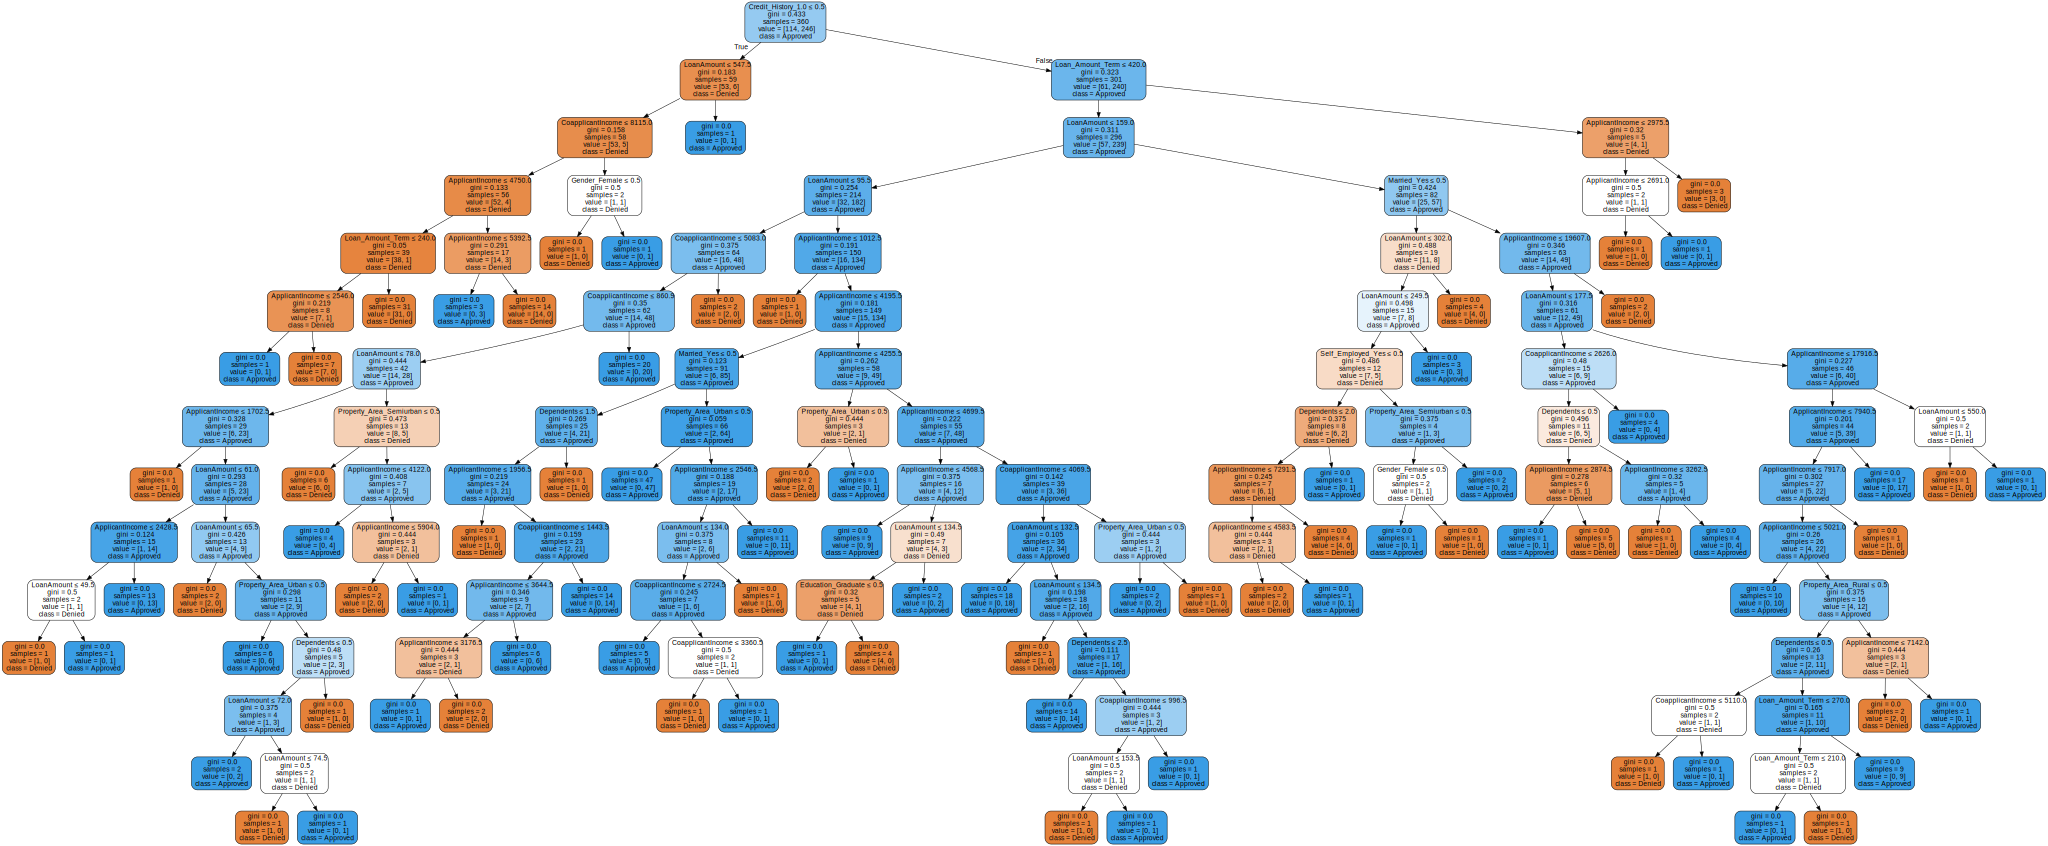

In [14]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.render("first_tree_labeled") 
graph 

## 2. Decision Tree: train on randomly split training set with dummies, random_state = 57, max_depth = 3 

In [15]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [16]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [18]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.775

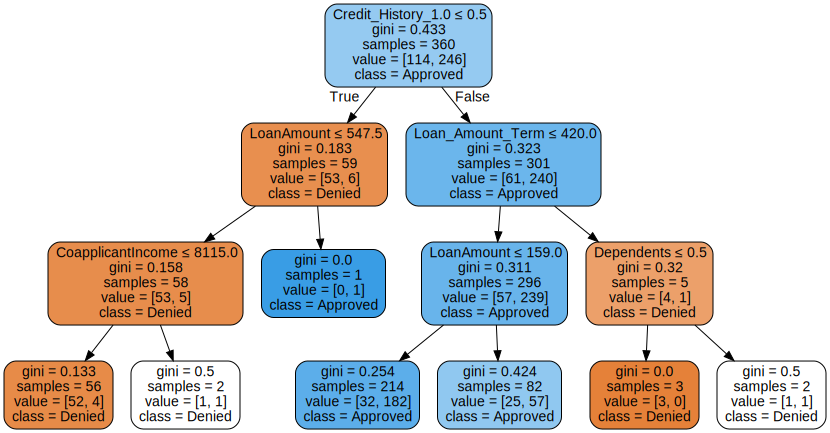

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.render("first_tree_labeled") 
graph 

## 3. Decision Tree: train on randomly split training set with dummies, random_state = 57, max_depth = 3, take out Loan_Amount_Term column

In [20]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [21]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [23]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7916666666666666

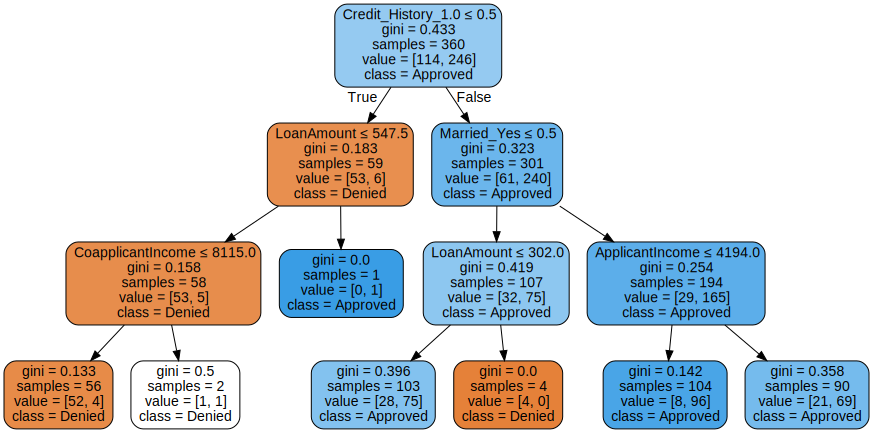

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.render("first_tree_labeled") 
graph 

## 4. Decision Tree: train on randomly split training set with dummies, random_state = 57, max_depth = 3, take out Loan_Amount_Term  and LoanAmount columns, since these could be considered results

In [25]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [26]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'LoanAmount', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [28]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7416666666666667

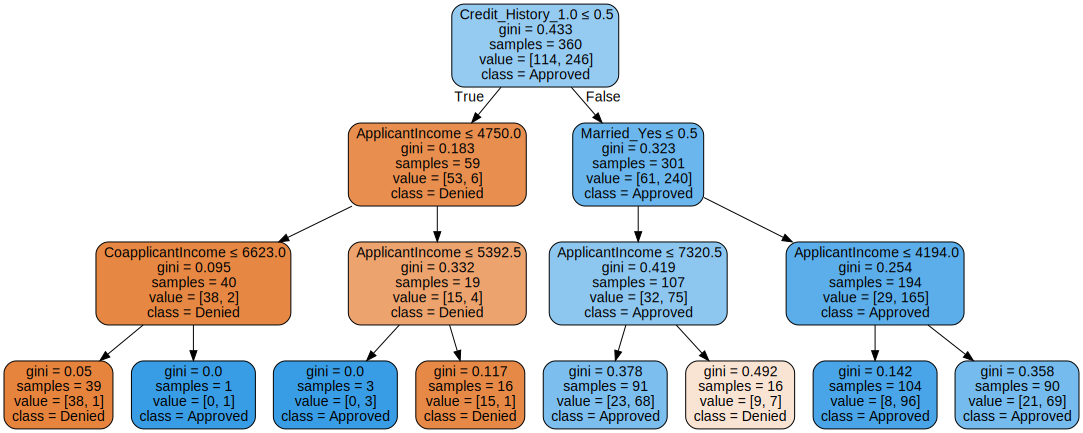

In [29]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.render("first_tree_labeled") 
graph 

## 5. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID"], axis=1)
feature_names = data.columns

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [33]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7944444444444444
Test score:  0.7666666666666667


In [34]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2504397941056493, 'Credit_History_1.0'),
 (0.20187713567979507, 'ApplicantIncome'),
 (0.198766854322061, 'LoanAmount'),
 (0.09964913219326764, 'CoapplicantIncome'),
 (0.04948014856455617, 'Dependents'),
 (0.04762827149205585, 'Loan_Amount_Term'),
 (0.029586002104515185, 'Married_Yes'),
 (0.023681452220938516, 'Property_Area_Semiurban'),
 (0.02217083483627266, 'Education_Graduate'),
 (0.02086805884819205, 'Gender_Female'),
 (0.020834252581459593, 'Self_Employed_Yes'),
 (0.018969443526500235, 'Property_Area_Rural'),
 (0.016048619524736647, 'Property_Area_Urban')]

In [35]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  1.0
Training score with oob sampling, parameters added:  0.7861111111111111
Test score, parameters added:  0.75


In [36]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.30557582196378635, 'Credit_History_1.0'),
 (0.2114176849186464, 'ApplicantIncome'),
 (0.18867605695605144, 'LoanAmount'),
 (0.08863946728891228, 'CoapplicantIncome'),
 (0.04367617392598714, 'Loan_Amount_Term'),
 (0.03630376114636369, 'Dependents'),
 (0.031136847959338722, 'Married_Yes'),
 (0.01852891144307501, 'Property_Area_Semiurban'),
 (0.017033043228412363, 'Property_Area_Rural'),
 (0.01702559746548341, 'Education_Graduate'),
 (0.016889370286406084, 'Self_Employed_Yes'),
 (0.013732780749190102, 'Gender_Female'),
 (0.01136448266834704, 'Property_Area_Urban')]

## 6. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200, take out Loan_Amount_Term column

In [37]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [39]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7972222222222223
Test score:  0.7583333333333333


In [40]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.25498912235832055, 'Credit_History_1.0'),
 (0.21187927805740348, 'LoanAmount'),
 (0.20808514379583062, 'ApplicantIncome'),
 (0.11096041425932875, 'CoapplicantIncome'),
 (0.05470169608386134, 'Dependents'),
 (0.03227277450928897, 'Married_Yes'),
 (0.024356715370097967, 'Gender_Female'),
 (0.023048630848759702, 'Property_Area_Semiurban'),
 (0.022453448017716798, 'Education_Graduate'),
 (0.02107698955032682, 'Self_Employed_Yes'),
 (0.020016859704090666, 'Property_Area_Rural'),
 (0.0161589274449745, 'Property_Area_Urban')]

In [41]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  1.0
Training score with oob sampling, parameters added:  0.7944444444444444
Test score, parameters added:  0.7416666666666667


In [42]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.30498512196239186, 'Credit_History_1.0'),
 (0.2160476501802729, 'ApplicantIncome'),
 (0.21111673224553468, 'LoanAmount'),
 (0.09500806890399695, 'CoapplicantIncome'),
 (0.0377066632682417, 'Dependents'),
 (0.02883857527041209, 'Married_Yes'),
 (0.022291788167097436, 'Property_Area_Semiurban'),
 (0.01891838492079323, 'Education_Graduate'),
 (0.017614255424890982, 'Property_Area_Rural'),
 (0.017488175403458126, 'Gender_Female'),
 (0.015607981480575482, 'Self_Employed_Yes'),
 (0.014376602772334629, 'Property_Area_Urban')]

## 7. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200, take out Loan_Amount_Term  and LoanAmount columns, since these could be considered results 

In [43]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'LoanAmount', 'Loan_Amount_Term'], axis=1)
feature_names = data.columns

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [45]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.9972222222222222
Training score with oob sampling:  0.7555555555555555
Test score:  0.7333333333333333


In [46]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.34526306451668054, 'ApplicantIncome'),
 (0.2665608182884271, 'Credit_History_1.0'),
 (0.1384992751901674, 'CoapplicantIncome'),
 (0.06717742322435895, 'Dependents'),
 (0.0374603963947419, 'Married_Yes'),
 (0.03295002194873833, 'Education_Graduate'),
 (0.027009145983045994, 'Gender_Female'),
 (0.024546986662351104, 'Property_Area_Semiurban'),
 (0.023265209757554993, 'Self_Employed_Yes'),
 (0.01992911168239313, 'Property_Area_Rural'),
 (0.017338546351540664, 'Property_Area_Urban')]

In [47]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  0.9972222222222222
Training score with oob sampling, parameters added:  0.7638888888888888
Test score, parameters added:  0.7333333333333333


In [48]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3624463885265756, 'ApplicantIncome'),
 (0.30808390530403645, 'Credit_History_1.0'),
 (0.1281477915359959, 'CoapplicantIncome'),
 (0.048204050351686636, 'Dependents'),
 (0.03636374594281293, 'Married_Yes'),
 (0.02301087482627837, 'Property_Area_Semiurban'),
 (0.022354167817401585, 'Property_Area_Rural'),
 (0.02224102119391599, 'Education_Graduate'),
 (0.01778453477924619, 'Gender_Female'),
 (0.01596346673772125, 'Property_Area_Urban'),
 (0.01540005298432915, 'Self_Employed_Yes')]

#https://scikit-learn.org/stable/modules/ensemble.html#forest
#max_features=None, max_depth=None, min_samples_split=2 suggested (in this particular case, decreased score by about 0.05)

#Also suggest: "...in random forests, bootstrap samples are used by default (bootstrap=True) while the default strategy for extra-trees is to use the whole dataset (bootstrap=False). When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. This can be enabled by setting oob_score=True."

## 8. Random Forest: train on randomly split training set with dummies, random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with importance < 0.03 in both versions of previous run ('Property_Area_Semiurban', 'Property_Area_Rural', 'Gender_Female', 'Education_Graduate', 'Self_Employed_Yes', 'Property_Area_Urban')

In [49]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [50]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [51]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.9972222222222222
Training score with oob sampling:  0.7916666666666666
Test score:  0.6583333333333333


In [52]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.453234036956138, 'ApplicantIncome'),
 (0.29429440671511614, 'Credit_History_1.0'),
 (0.16386487914260292, 'CoapplicantIncome'),
 (0.05778607336714683, 'Dependents'),
 (0.03082060381899602, 'Married_Yes')]

In [53]:
#Create a random forest classifier with parameter modifications suggested in 
#https://scikit-learn.org/stable/modules/ensemble.html#forest
rf = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=None, max_depth=None, min_samples_split=2)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score, parameters added: ', rf.score(X_train, y_train))
print('Training score with oob sampling, parameters added: ', rf.oob_score_)
print('Test score, parameters added: ', rf.score(X_test, y_test))

Training score, parameters added:  0.9972222222222222
Training score with oob sampling, parameters added:  0.7777777777777778
Test score, parameters added:  0.6666666666666666


In [54]:
# Examine feature importances with added parameters
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.45548987850386996, 'ApplicantIncome'),
 (0.3068277181315625, 'Credit_History_1.0'),
 (0.1463541651447669, 'CoapplicantIncome'),
 (0.05377785485591847, 'Dependents'),
 (0.037550383363882285, 'Married_Yes')]

### 9. Limited set, decision tree

In [55]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [56]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [58]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.625

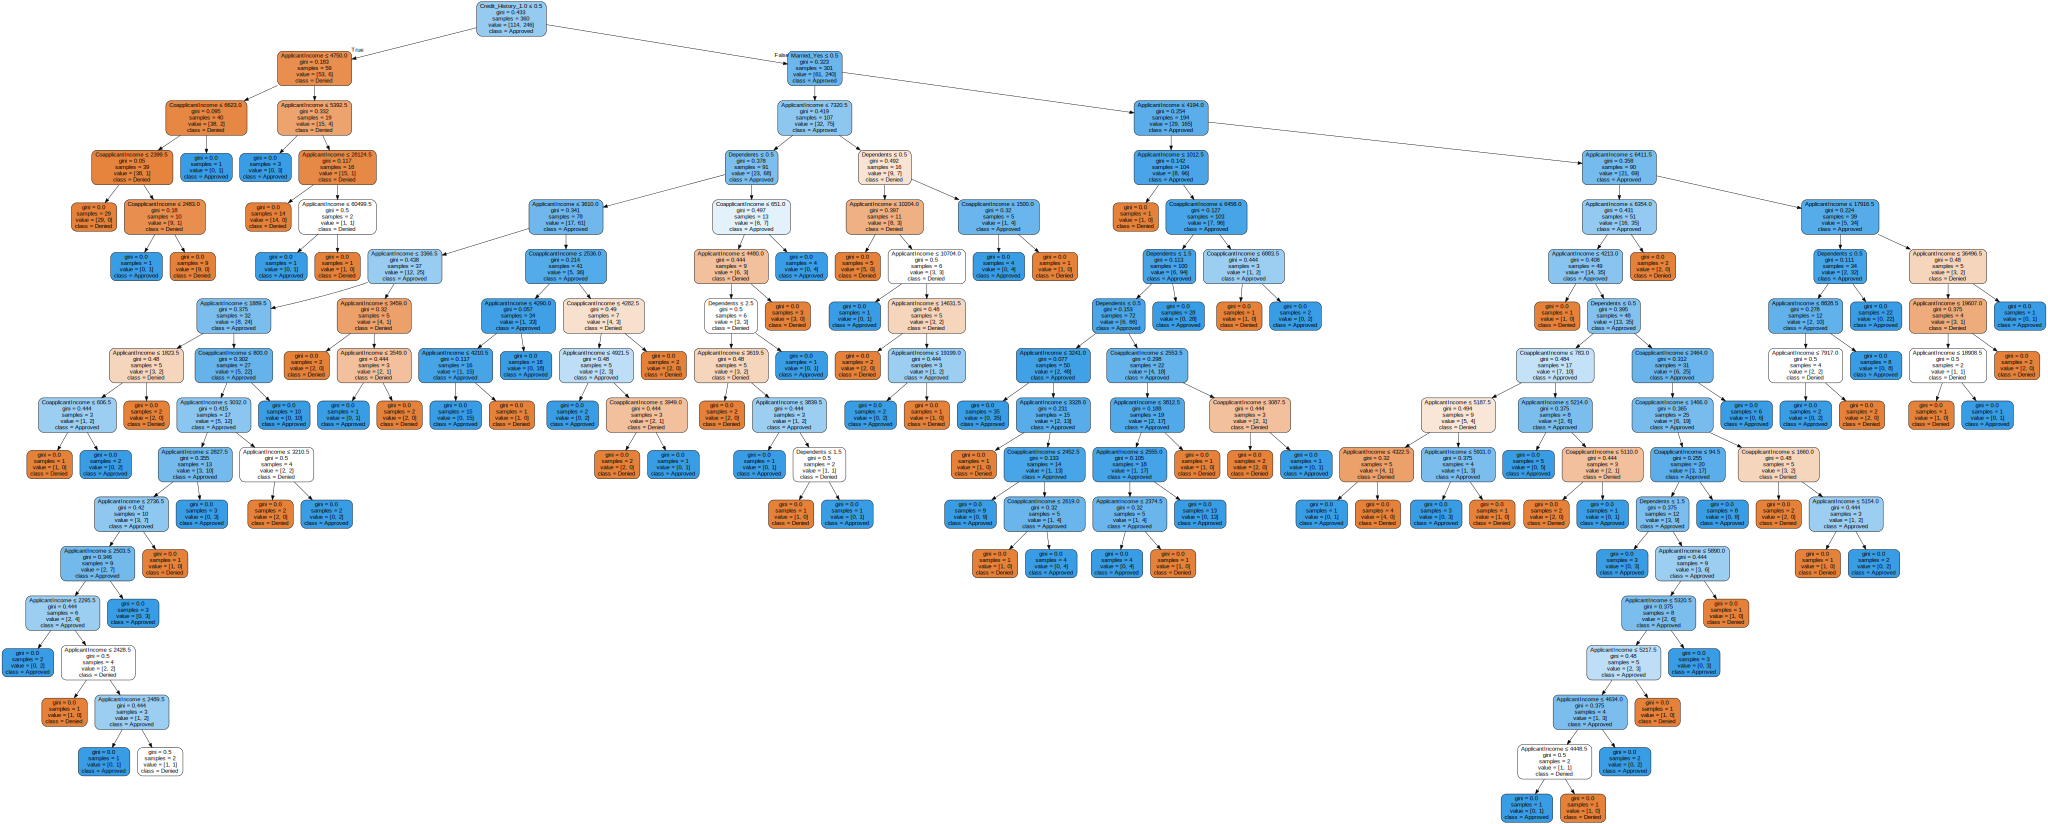

In [59]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.render("first_tree_labeled") 
graph 

### 9. Limited set, smaller decision tree

In [60]:
target = train_data_limit_dummies["Loan_Status_Y"]
target_names = ["Denied", "Approved"]

In [61]:
data = train_data_limit_dummies.drop(["Loan_Status_Y", "Loan_ID", 'Property_Area_Urban', 'Self_Employed_Yes', 'LoanAmount', 'Education_Graduate', 'Gender_Female', 'Loan_Amount_Term', 'Property_Area_Semiurban', 'Property_Area_Rural'], axis=1)
feature_names = data.columns

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [63]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7416666666666667

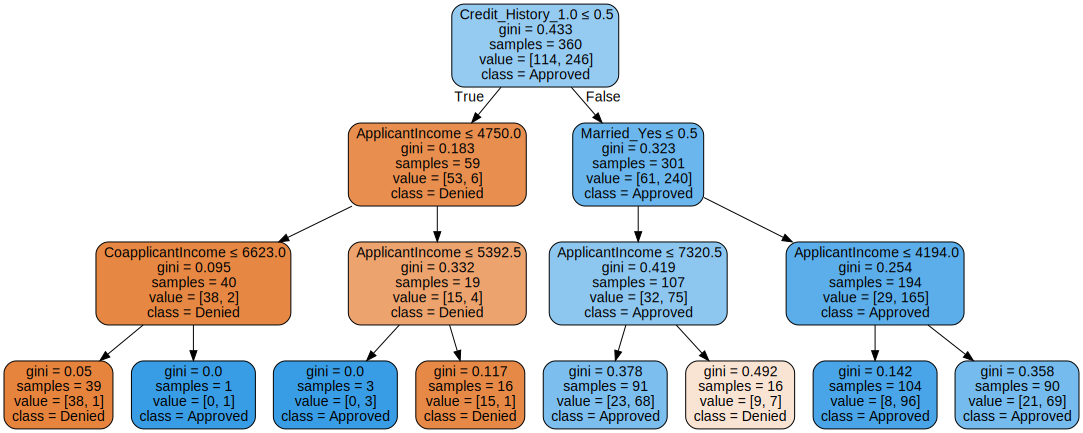

In [64]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=feature_names,  
                     class_names=target_names,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = gv.Source(dot_data) 
graph.render("first_tree_labeled") 
graph 